# 04. Self Oil Station Price Analysis

## 1. 셀레니움 설치
- 윈도우
- conda install selenium
- chromedriver

In [1]:
!pip install selenium

     ---------------------------------------- 6.3/6.3 MB 10.6 MB/s eta 0:00:00
     ------------------------------------- 384.9/384.9 kB 12.1 MB/s eta 0:00:00
     ---------------------------------------- 58.3/58.3 kB ? eta 0:00:00


In [9]:
!pip list | grep pa

'grep'��(��) ���� �Ǵ� �ܺ� ����, ������ �� �ִ� ���α׷�, �Ǵ�
��ġ ������ �ƴմϴ�.


In [10]:
from selenium import webdriver

In [15]:
driver = webdriver.Chrome('../dirver/chromedriver.exe')
driver.get('https://www.naver.com')

C:\Users\user\AppData\Local\Temp\ipykernel_21604\1690197375.py:1: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome('../dirver/chromedriver.exe')


In [16]:
driver.quit()

## 2. 셀프 주유소가 정말 저렴한가? - 데이터 확보하기 위한 작업
- https://www.opinet.co.kr/searRgSelect.do
- 사이트 구조 확인
- 목표데이터
    - 브랜드
    - 가격
    - 셀프 주유 여부
    - 위치

## 3. 셀레니움으로 접근

In [1]:
from selenium import webdriver
from selenium.webdriver.common.by import By

In [6]:
url = 'https://www.opinet.co.kr/searRgSelect.do'
driver = webdriver.Chrome('../dirver/chromedriver.exe')
driver.get(url)

C:\Users\user\AppData\Local\Temp\ipykernel_11548\2888626904.py:2: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome('../dirver/chromedriver.exe')


In [5]:
driver.get(url)

InvalidSessionIdException: Message: invalid session id
Stacktrace:
Backtrace:
	(No symbol) [0x00EFF243]
	(No symbol) [0x00E87FD1]
	(No symbol) [0x00D7CF10]
	(No symbol) [0x00DA1009]
	(No symbol) [0x00DC8486]
	(No symbol) [0x00DC530A]
	(No symbol) [0x00DC4E48]
	(No symbol) [0x00D5A1D7]
	(No symbol) [0x00D5A87E]
	(No symbol) [0x00D5ACBA]
	GetHandleVerifier [0x01199A22+2655074]
	GetHandleVerifier [0x0118CA24+2601828]
	GetHandleVerifier [0x00FA8C0A+619850]
	GetHandleVerifier [0x00FA7830+614768]
	(No symbol) [0x00E905FC]
	(No symbol) [0x00D5A047]
	(No symbol) [0x00D59A52]
	GetHandleVerifier [0x011AB6DC+2727964]
	BaseThreadInitThunk [0x75BC00F9+25]
	RtlGetAppContainerNamedObjectPath [0x77CD7BBE+286]
	RtlGetAppContainerNamedObjectPath [0x77CD7B8E+238]


- 문제
    - 1. 해당 url로 한번에 접근 불가
    - 2. 메인페이지로 접속되고, 팝업창이 하나 뜬다

# 팝업창 화면 전환 후 닫아주기


In [10]:
driver.switch_to.window((driver.window_handles[-1]))

# 접근 페이지 다시요청

In [16]:
driver.close()

WebDriverException: Message: disconnected: unable to connect to renderer
  (failed to check if window was closed: disconnected: unable to connect to renderer)
  (Session info: chrome=108.0.5359.125)
Stacktrace:
Backtrace:
	(No symbol) [0x00EFF243]
	(No symbol) [0x00E87FD1]
	(No symbol) [0x00D7D04D]
	(No symbol) [0x00D6D3F8]
	(No symbol) [0x00D614E4]
	(No symbol) [0x00D62344]
	(No symbol) [0x00DD17A5]
	(No symbol) [0x00DC8553]
	(No symbol) [0x00DA163C]
	(No symbol) [0x00DA269D]
	GetHandleVerifier [0x01199A22+2655074]
	GetHandleVerifier [0x0118CA24+2601828]
	GetHandleVerifier [0x00FA8C0A+619850]
	GetHandleVerifier [0x00FA7830+614768]
	(No symbol) [0x00E905FC]
	(No symbol) [0x00E95968]
	(No symbol) [0x00E95A55]
	(No symbol) [0x00EA051B]
	BaseThreadInitThunk [0x75BC00F9+25]
	RtlGetAppContainerNamedObjectPath [0x77CD7BBE+286]
	RtlGetAppContainerNamedObjectPath [0x77CD7B8E+238]


In [12]:
driver.switch_to.window((driver.window_handles[-1]))

In [14]:
driver.get(url)

In [24]:
import time

def main_get():
    # 페이지 접근
    url = 'https://www.opinet.co.kr/searRgSelect.do'
    driver = webdriver.Chrome('../dirver/chromedriver.exe')
    driver.get(url)
    time.sleep(3)

    # 팝업창으로 전환
    driver.switch_to.window((driver.window_handles[-1]))

    # 팝업창 닫기
    driver.close()
    time.sleep(3)

    # 메인화면 창으로 전환
    driver.switch_to.window((driver.window_handles[-1]))

    # 접근 url 재요청
    driver.get(url)

In [26]:
main_get()

C:\Users\user\AppData\Local\Temp\ipykernel_11548\2225081561.py:6: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome('../dirver/chromedriver.exe')


In [30]:
# 지역 : 시/도

sido_list_raw = driver.find_element(By.ID, 'SIDO_NM0')
sido_list_raw.text

'            시/도\n            \n             \n             \n              서울\n             \n            \n             \n             \n              부산\n             \n            \n             \n             \n              대구\n             \n            \n             \n             \n              인천\n             \n            \n             \n             \n              광주\n             \n            \n             \n             \n              대전\n             \n            \n             \n             \n              울산\n             \n            \n             \n             \n              세종\n             \n            \n             \n              경기\n             \n             \n            \n             \n             \n              강원\n             \n            \n             \n             \n              충북\n             \n            \n             \n             \n              충남\n             \n            \n             \n             \n              

In [33]:
sido_list=sido_list_raw.find_elements(By.TAG_NAME, 'option')
len(sido_list), sido_list[1].text

(18, '서울')

In [34]:
sido_list[1].get_attribute('value')

'서울특별시'

In [35]:
sido_names = []

for option in sido_list:
    sido_names.append(option.get_attribute('value'))
sido_names

['',
 '서울특별시',
 '부산광역시',
 '대구광역시',
 '인천광역시',
 '광주광역시',
 '대전광역시',
 '울산광역시',
 '세종특별자치시',
 '경기도',
 '강원도',
 '충청북도',
 '충청남도',
 '전라북도',
 '전라남도',
 '경상북도',
 '경상남도',
 '제주특별자치도']

In [36]:
sido_names = [option.get_attribute('value') for option in sido_list]
sido_names

['',
 '서울특별시',
 '부산광역시',
 '대구광역시',
 '인천광역시',
 '광주광역시',
 '대전광역시',
 '울산광역시',
 '세종특별자치시',
 '경기도',
 '강원도',
 '충청북도',
 '충청남도',
 '전라북도',
 '전라남도',
 '경상북도',
 '경상남도',
 '제주특별자치도']

In [37]:
sido_names = sido_names[1:]
sido_names

['서울특별시',
 '부산광역시',
 '대구광역시',
 '인천광역시',
 '광주광역시',
 '대전광역시',
 '울산광역시',
 '세종특별자치시',
 '경기도',
 '강원도',
 '충청북도',
 '충청남도',
 '전라북도',
 '전라남도',
 '경상북도',
 '경상남도',
 '제주특별자치도']

In [38]:
sido_names[0]

'서울특별시'

In [42]:
sido_list_raw.send_keys(sido_names[0])

In [45]:
# 구

gu_list_raw = driver.find_element(By.ID, 'SIGUNGU_NM0') # 부모태그
gu_list =gu_list_raw.find_elements(By.TAG_NAME, 'option') # 자식태그

gu_names = [option.get_attribute('value') for option in gu_list]
gu_names = gu_names[1:]
gu_names, len(gu_names)

(['강남구',
  '강동구',
  '강북구',
  '강서구',
  '관악구',
  '광진구',
  '구로구',
  '금천구',
  '노원구',
  '도봉구',
  '동대문구',
  '동작구',
  '마포구',
  '서대문구',
  '서초구',
  '성동구',
  '성북구',
  '송파구',
  '양천구',
  '영등포구',
  '용산구',
  '은평구',
  '종로구',
  '중구',
  '중랑구'],
 25)

In [46]:
gu_list_raw.send_keys(gu_names[15])

In [47]:
# 엑셀 저장

driver.find_element(By.ID, 'glopopd_excel').click()

In [48]:
driver.find_element(By.XPATH, '//*[@id="glopopd_excel"]').click()

In [49]:
element_get_excel = driver.find_element(By.ID, 'glopopd_excel')
element_get_excel.click()

In [55]:
import time
from tqdm import tqdm_notebook

for gu in tqdm_notebook(gu_names):
    element = driver.find_element(By.ID, 'SIGUNGU_NM0')
    element.send_keys(gu)
    time.sleep(3)

    element_get_excel = driver.find_element(By.ID, 'glopopd_excel').click()
    time.sleep(3)

C:\Users\user\AppData\Local\Temp\ipykernel_11548\339091764.py:4: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for gu in tqdm_notebook(gu_names):


  0%|          | 0/25 [00:00<?, ?it/s]

In [56]:
driver.close()

## 4. 데이터 정리하기

In [59]:
import pandas as pd
from glob import glob

In [108]:
# 파일 목록 한번에 가져오기
glob('../data/지역_*.xls')

['../data\\지역_위치별(주유소) (1).xls',
 '../data\\지역_위치별(주유소) (10).xls',
 '../data\\지역_위치별(주유소) (11).xls',
 '../data\\지역_위치별(주유소) (12).xls',
 '../data\\지역_위치별(주유소) (13).xls',
 '../data\\지역_위치별(주유소) (14).xls',
 '../data\\지역_위치별(주유소) (15).xls',
 '../data\\지역_위치별(주유소) (16).xls',
 '../data\\지역_위치별(주유소) (17).xls',
 '../data\\지역_위치별(주유소) (18).xls',
 '../data\\지역_위치별(주유소) (19).xls',
 '../data\\지역_위치별(주유소) (2).xls',
 '../data\\지역_위치별(주유소) (20).xls',
 '../data\\지역_위치별(주유소) (21).xls',
 '../data\\지역_위치별(주유소) (22).xls',
 '../data\\지역_위치별(주유소) (23).xls',
 '../data\\지역_위치별(주유소) (24).xls',
 '../data\\지역_위치별(주유소) (25).xls',
 '../data\\지역_위치별(주유소) (3).xls',
 '../data\\지역_위치별(주유소) (4).xls',
 '../data\\지역_위치별(주유소) (5).xls',
 '../data\\지역_위치별(주유소) (6).xls',
 '../data\\지역_위치별(주유소) (7).xls',
 '../data\\지역_위치별(주유소) (8).xls',
 '../data\\지역_위치별(주유소) (9).xls',
 '../data\\지역_위치별(주유소).xls']

In [110]:
# 파일명 저장
station_files = glob('../data/지역_*.xls')
station_files, len(station_files)

(['../data\\지역_위치별(주유소) (1).xls',
  '../data\\지역_위치별(주유소) (10).xls',
  '../data\\지역_위치별(주유소) (11).xls',
  '../data\\지역_위치별(주유소) (12).xls',
  '../data\\지역_위치별(주유소) (13).xls',
  '../data\\지역_위치별(주유소) (14).xls',
  '../data\\지역_위치별(주유소) (15).xls',
  '../data\\지역_위치별(주유소) (16).xls',
  '../data\\지역_위치별(주유소) (17).xls',
  '../data\\지역_위치별(주유소) (18).xls',
  '../data\\지역_위치별(주유소) (19).xls',
  '../data\\지역_위치별(주유소) (2).xls',
  '../data\\지역_위치별(주유소) (20).xls',
  '../data\\지역_위치별(주유소) (21).xls',
  '../data\\지역_위치별(주유소) (22).xls',
  '../data\\지역_위치별(주유소) (23).xls',
  '../data\\지역_위치별(주유소) (24).xls',
  '../data\\지역_위치별(주유소) (25).xls',
  '../data\\지역_위치별(주유소) (3).xls',
  '../data\\지역_위치별(주유소) (4).xls',
  '../data\\지역_위치별(주유소) (5).xls',
  '../data\\지역_위치별(주유소) (6).xls',
  '../data\\지역_위치별(주유소) (7).xls',
  '../data\\지역_위치별(주유소) (8).xls',
  '../data\\지역_위치별(주유소) (9).xls',
  '../data\\지역_위치별(주유소).xls'],
 26)

In [111]:
# 하나만 읽어보기
tmp = pd.read_excel(station_files[0], header=2)
tmp.tail(2)

,지역,상호,주소,상표,전화번호,셀프여부,고급휘발유,휘발유,경유,실내등유
11,서울특별시,SK매일주유소,서울특별시 강북구 삼양로 217 (미아동),SK에너지,02-982-8855,Y,-,1568,1368,-
12,서울특별시,(주)에이앤이청담주유소,서울특별시 강북구 도봉로 155 (미아동),SK에너지,02-981-5131,Y,-,-,-,-


In [112]:
tmp_raw = []
for file_name in station_files:
    tmp = pd.read_excel(file_name, header=2)
    tmp_raw.append(tmp)

- 형식이 동일하고 연달아 붙이기만 하면 될때는 concatm

In [118]:
stations_raw = pd.concat(tmp_raw)
stations_raw

,지역,상호,주소,상표,전화번호,셀프여부,고급휘발유,휘발유,경유,실내등유
0,서울특별시,수유동주유소,서울특별시 강북구 도봉로 395 (수유동),GS칼텍스,02-902-9470,Y,-,1507,1297,-
1,서울특별시,태창에너지 좋은기름주유소,서울특별시 강북구 덕릉로 158 (번동),S-OIL,02-989-9806,N,-,1519,1319,-
2,서울특별시,(주)에프알엔디 직영 송정주유소,서울특별시 강북구 인수봉로 185 (수유동),SK에너지,02-993-5189,N,-,1519,1309,-
3,서울특별시,지에스이앤알 직영 미아주유소,서울특별시 강북구 도봉로 122 (미아동),GS칼텍스,02-987-5152,Y,1890,1519,1309,-
4,서울특별시,세종에너지 직영 세종주유소,서울특별시 강북구 삼양로 410 (수유동),S-OIL,02-907-5182,Y,-,1519,1309,1000
...,...,...,...,...,...,...,...,...,...,...
14,서울특별시,명일주유소,서울 강동구 고덕로 168 (명일동),SK에너지,02-3428-1739,N,1859,1679,1489,-
15,서울특별시,(주)삼표에너지 고덕주유소,서울 강동구 고덕로 39 (암사동),GS칼텍스,02-441-3327,N,1889,1689,1489,1180
16,서울특별시,CJ대한통운(주)직영 천호점주유소,서울 강동구 천중로 67 (천호동),현대오일뱅크,02-473-5189,N,-,1697,1499,1100
17,서울특별시,강동주유소,서울 강동구 양재대로 1509 (길동),SK에너지,02-477-5101,N,2263,1988,1798,1288


In [119]:
stations_raw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 543 entries, 0 to 18
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   지역      543 non-null    object
 1   상호      543 non-null    object
 2   주소      543 non-null    object
 3   상표      543 non-null    object
 4   전화번호    543 non-null    object
 5   셀프여부    543 non-null    object
 6   고급휘발유   543 non-null    object
 7   휘발유     543 non-null    object
 8   경유      543 non-null    object
 9   실내등유    543 non-null    object
dtypes: object(10)
memory usage: 46.7+ KB


In [120]:
stations = pd.DataFrame({
    '상호' : stations_raw['상호'],
    '주소' :stations_raw['주소'],
    '가격' : stations_raw['휘발유'],
    '셀프' : stations_raw['셀프여부'],
    '상표' : stations_raw['상표']
})
stations.tail()

,상호,주소,가격,셀프,상표
14,명일주유소,서울 강동구 고덕로 168 (명일동),1679,N,SK에너지
15,(주)삼표에너지 고덕주유소,서울 강동구 고덕로 39 (암사동),1689,N,GS칼텍스
16,CJ대한통운(주)직영 천호점주유소,서울 강동구 천중로 67 (천호동),1697,N,현대오일뱅크
17,강동주유소,서울 강동구 양재대로 1509 (길동),1988,N,SK에너지
18,명진석유(주)동서울주유소,서울특별시 강동구 천호대로 1456 (상일동),-,Y,GS칼텍스


In [121]:
stations['주소']

0       서울특별시 강북구  도봉로 395 (수유동)
1        서울특별시 강북구  덕릉로 158 (번동)
2       서울특별시 강북구 인수봉로 185 (수유동)
3       서울특별시 강북구  도봉로 122 (미아동)
4        서울특별시 강북구 삼양로 410 (수유동)
                 ...            
14          서울 강동구 고덕로 168 (명일동)
15           서울 강동구 고덕로 39 (암사동)
16           서울 강동구 천중로 67 (천호동)
17         서울 강동구 양재대로 1509 (길동)
18    서울특별시 강동구  천호대로 1456 (상일동)
Name: 주소, Length: 543, dtype: object

In [123]:
for eachAddress in stations['주소']:
    print(eachAddress.split()[1])

강북구
강북구
강북구
강북구
강북구
강북구
강북구
강북구
강북구
강북구
강북구
강북구
강북구
동대문구
동대문구
동대문구
동대문구
동대문구
동대문구
동대문구
동대문구
동대문구
동대문구
동대문구
동대문구
동대문구
동대문구
동대문구
동대문구
동대문구
동대문구
동대문구
동대문구
동대문구
동대문구
동작구
동작구
동작구
동작구
동작구
동작구
동작구
동작구
동작구
동작구
동작구
동작구
마포구
마포구
마포구
마포구
마포구
마포구
마포구
마포구
마포구
마포구
마포구
마포구
마포구
마포구
서대문구
서대문구
서대문구
서대문구
서대문구
서대문구
서대문구
서대문구
서대문구
서대문구
서대문구
서대문구
서대문구
서대문구
서대문구
서대문구
서대문구
서초구
서초구
서초구
서초구
서초구
서초구
서초구
서초구
서초구
서초구
서초구
서초구
서초구
서초구
서초구
서초구
서초구
서초구
서초구
서초구
서초구
서초구
서초구
서초구
서초구
서초구
서초구
서초구
서초구
서초구
서초구
서초구
서초구
서초구
서초구
서초구
서초구
서초구
서초구
서초구
서초구
성동구
성동구
성동구
성동구
성동구
성동구
성동구
성동구
성동구
성동구
성동구
서울특별시
성동구
성동구
성동구
성동구
성동구
성동구
성북구
성북구
성북구
성북구
성북구
성북구
성북구
성북구
성북구
성북구
성북구
성북구
성북구
성북구
성북구
성북구
성북구
성북구
성북구
성북구
성북구
성북구
성북구
송파구
송파구
송파구
송파구
송파구
송파구
송파구
송파구
송파구
송파구
송파구
송파구
송파구
송파구
송파구
송파구
송파구
송파구
송파구
송파구
송파구
송파구
송파구
송파구
송파구
송파구
송파구
송파구
송파구
송파구
송파구
송파구
양천구
양천구
양천구
양천구
양천구
양천구
양천구
양천구
양천구
양천구
양천구
양천구
양천구
양천구
양천구
양천구
양천구
양천구
양천구
양천구
양천구
양천구
양천구
양천구
양천구
양천구
영등포구
영등포구
영등포구
영등포구
영등포구
영등포구
영등포구
영등포구
영등포구
영등포구
영등포구
영등포구
영등포구
영등포구
영등포구
영등포구
영등포구
영등

In [124]:
stations['구'] = [eachAddress.split()[1] for eachAddress in stations['주소']]
stations

,상호,주소,가격,셀프,상표,구
0,수유동주유소,서울특별시 강북구 도봉로 395 (수유동),1507,Y,GS칼텍스,강북구
1,태창에너지 좋은기름주유소,서울특별시 강북구 덕릉로 158 (번동),1519,N,S-OIL,강북구
2,(주)에프알엔디 직영 송정주유소,서울특별시 강북구 인수봉로 185 (수유동),1519,N,SK에너지,강북구
3,지에스이앤알 직영 미아주유소,서울특별시 강북구 도봉로 122 (미아동),1519,Y,GS칼텍스,강북구
4,세종에너지 직영 세종주유소,서울특별시 강북구 삼양로 410 (수유동),1519,Y,S-OIL,강북구
...,...,...,...,...,...,...
14,명일주유소,서울 강동구 고덕로 168 (명일동),1679,N,SK에너지,강동구
15,(주)삼표에너지 고덕주유소,서울 강동구 고덕로 39 (암사동),1689,N,GS칼텍스,강동구
16,CJ대한통운(주)직영 천호점주유소,서울 강동구 천중로 67 (천호동),1697,N,현대오일뱅크,강동구
17,강동주유소,서울 강동구 양재대로 1509 (길동),1988,N,SK에너지,강동구


In [131]:
stations['구'].unique(), len(stations['구'].unique())

(array(['강북구', '동대문구', '동작구', '마포구', '서대문구', '서초구', '성동구', '서울특별시', '성북구',
        '송파구', '양천구', '영등포구', '강서구', '용산구', '은평구', '종로구', '중구', '중랑구',
        '강남구', '관악구', '광진구', '구로구', '금천구', '노원구', '도봉구', '특별시', '강동구'],
       dtype=object),
 27)

In [144]:
stations[stations['구'] == '서울특별시','구'] == '성동구'
stations.loc[stations['구'] == '특별시','구'] == '도봉구'
stations['구'].unique()

InvalidIndexError: (0     False
1     False
2     False
3     False
4     False
      ...  
14    False
15    False
16    False
17    False
18    False
Name: 구, Length: 543, dtype: bool, '구')

In [145]:
stations.loc[stations['구'] == '서울특별시','구'] = '성동구'
stations.loc[stations['구'] == '특별시','구'] = '도봉구'
stations['구'].unique()

array(['강북구', '동대문구', '동작구', '마포구', '서대문구', '서초구', '성동구', '성북구', '송파구',
       '양천구', '영등포구', '강서구', '용산구', '은평구', '종로구', '중구', '중랑구', '강남구',
       '관악구', '광진구', '구로구', '금천구', '노원구', '도봉구', '강동구'], dtype=object)

In [146]:
stations['구'].unique(), len(stations['구'].unique())

(array(['강북구', '동대문구', '동작구', '마포구', '서대문구', '서초구', '성동구', '성북구', '송파구',
        '양천구', '영등포구', '강서구', '용산구', '은평구', '종로구', '중구', '중랑구', '강남구',
        '관악구', '광진구', '구로구', '금천구', '노원구', '도봉구', '강동구'], dtype=object),
 25)

In [147]:
# 가격 데이터형 변환 object => float

stations['가격'] = stations['가격'].astype('float')

ValueError: could not convert string to float: '-'

In [149]:
# 가격 정보 없는 주유소
stations[stations['가격'] == '-']

,상호,주소,가격,셀프,상표,구
12,(주)에이앤이청담주유소,서울특별시 강북구 도봉로 155 (미아동),-,Y,SK에너지,강북구
11,(주)서우유통에너지,서울특별시 동작구 노량진로 78 (노량진동),-,N,S-OIL,동작구
13,서강주유소,서울 마포구 독막로 134 (창전동),-,N,SK에너지,마포구
25,목동주유소,서울 양천구 목동중앙로 125 (목동),-,N,S-OIL,양천구
34,하나주유소,서울특별시 영등포구 도림로 236 (신길동),-,N,S-OIL,영등포구
14,지에스칼텍스㈜ 소망주유소,서울 중랑구 망우로 475,-,Y,GS칼텍스,중랑구
18,명진석유(주)동서울주유소,서울특별시 강동구 천호대로 1456 (상일동),-,Y,GS칼텍스,강동구


In [153]:
# 가격 정보가 있는 주유소만 사용
stations = stations[stations['가격'] != '-']
stations.tail()

,상호,주소,가격,셀프,상표,구
13,SK네트윅스(주)한미주유소,서울 강동구 성내로 32 (성내동),1678,N,SK에너지,강동구
14,명일주유소,서울 강동구 고덕로 168 (명일동),1679,N,SK에너지,강동구
15,(주)삼표에너지 고덕주유소,서울 강동구 고덕로 39 (암사동),1689,N,GS칼텍스,강동구
16,CJ대한통운(주)직영 천호점주유소,서울 강동구 천중로 67 (천호동),1697,N,현대오일뱅크,강동구
17,강동주유소,서울 강동구 양재대로 1509 (길동),1988,N,SK에너지,강동구


In [154]:
stations['가격'] = stations['가격'].astype('float')

C:\Users\user\AppData\Local\Temp\ipykernel_11548\3413669420.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stations['가격'] = stations['가격'].astype('float')


In [155]:
stations.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 536 entries, 0 to 17
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   상호      536 non-null    object 
 1   주소      536 non-null    object 
 2   가격      536 non-null    float64
 3   셀프      536 non-null    object 
 4   상표      536 non-null    object 
 5   구       536 non-null    object 
dtypes: float64(1), object(5)
memory usage: 29.3+ KB


In [156]:
stations

,상호,주소,가격,셀프,상표,구
0,수유동주유소,서울특별시 강북구 도봉로 395 (수유동),1507.0,Y,GS칼텍스,강북구
1,태창에너지 좋은기름주유소,서울특별시 강북구 덕릉로 158 (번동),1519.0,N,S-OIL,강북구
2,(주)에프알엔디 직영 송정주유소,서울특별시 강북구 인수봉로 185 (수유동),1519.0,N,SK에너지,강북구
3,지에스이앤알 직영 미아주유소,서울특별시 강북구 도봉로 122 (미아동),1519.0,Y,GS칼텍스,강북구
4,세종에너지 직영 세종주유소,서울특별시 강북구 삼양로 410 (수유동),1519.0,Y,S-OIL,강북구
...,...,...,...,...,...,...
13,SK네트윅스(주)한미주유소,서울 강동구 성내로 32 (성내동),1678.0,N,SK에너지,강동구
14,명일주유소,서울 강동구 고덕로 168 (명일동),1679.0,N,SK에너지,강동구
15,(주)삼표에너지 고덕주유소,서울 강동구 고덕로 39 (암사동),1689.0,N,GS칼텍스,강동구
16,CJ대한통운(주)직영 천호점주유소,서울 강동구 천중로 67 (천호동),1697.0,N,현대오일뱅크,강동구


In [157]:
# 인덱스 재정렬
stations.reset_index(inplace=True)
stations.tail()

,index,상호,주소,가격,셀프,상표,구
531,13,SK네트윅스(주)한미주유소,서울 강동구 성내로 32 (성내동),1678.0,N,SK에너지,강동구
532,14,명일주유소,서울 강동구 고덕로 168 (명일동),1679.0,N,SK에너지,강동구
533,15,(주)삼표에너지 고덕주유소,서울 강동구 고덕로 39 (암사동),1689.0,N,GS칼텍스,강동구
534,16,CJ대한통운(주)직영 천호점주유소,서울 강동구 천중로 67 (천호동),1697.0,N,현대오일뱅크,강동구
535,17,강동주유소,서울 강동구 양재대로 1509 (길동),1988.0,N,SK에너지,강동구


In [158]:
del stations['index']
stations.head()

,상호,주소,가격,셀프,상표,구
0,수유동주유소,서울특별시 강북구 도봉로 395 (수유동),1507.0,Y,GS칼텍스,강북구
1,태창에너지 좋은기름주유소,서울특별시 강북구 덕릉로 158 (번동),1519.0,N,S-OIL,강북구
2,(주)에프알엔디 직영 송정주유소,서울특별시 강북구 인수봉로 185 (수유동),1519.0,N,SK에너지,강북구
3,지에스이앤알 직영 미아주유소,서울특별시 강북구 도봉로 122 (미아동),1519.0,Y,GS칼텍스,강북구
4,세종에너지 직영 세종주유소,서울특별시 강북구 삼양로 410 (수유동),1519.0,Y,S-OIL,강북구


### 5. 주유가격정보시각화

In [161]:
import matplotlib.pyplot as plt
import seaborn as sns
import platform
from matplotlib import font_manager,rc
%matplotlib inline
path = 'C:/Windows/Fonts/malgun.ttf'

if platform.system() == 'Darwin':
    rc('font', family = 'Arial Unicode MS')
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family = font_name)
else:
    print('unknown system')

<AxesSubplot: title={'center': '가격'}, xlabel='셀프'>

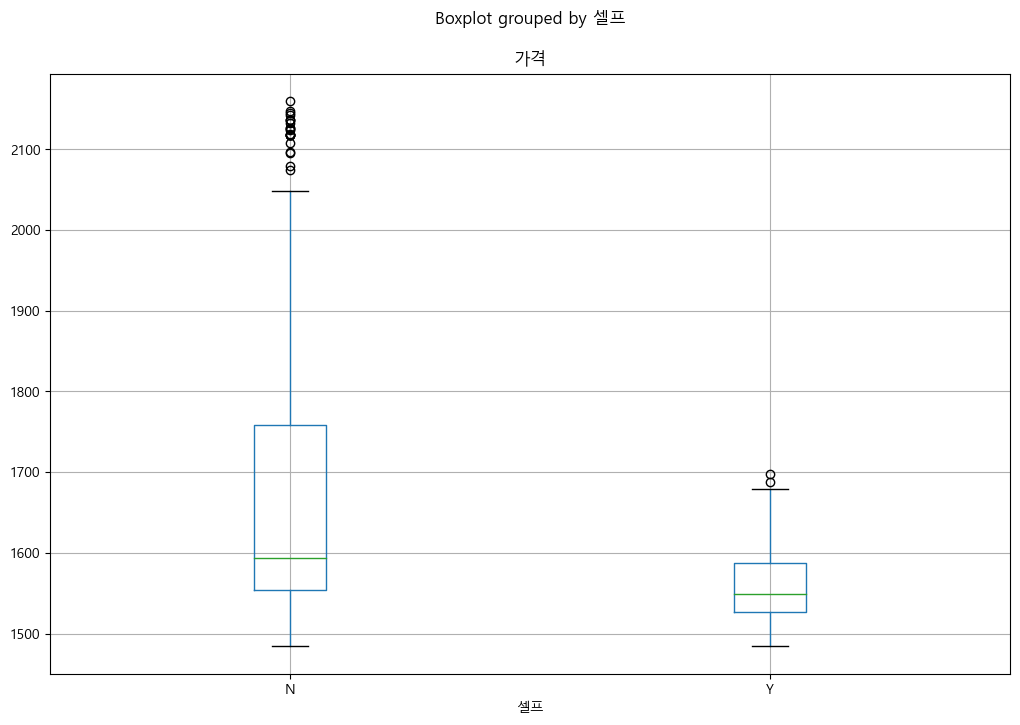

In [162]:
# boxplot(feat.pandas)

stations.boxplot(column = '가격', by='셀프', figsize=(12,8))

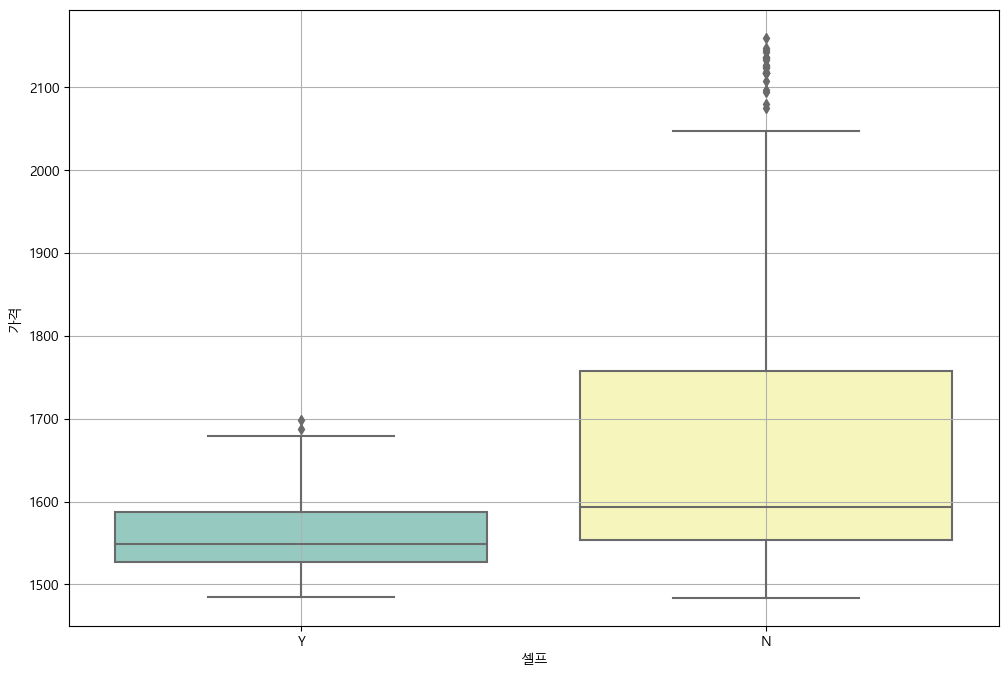

In [164]:
# boxplot(feat. seaborn)
plt.figure(figsize=(12,8))
sns.boxplot(x='셀프',y='가격', data=stations, palette='Set3')
plt.grid(True)
plt.show()

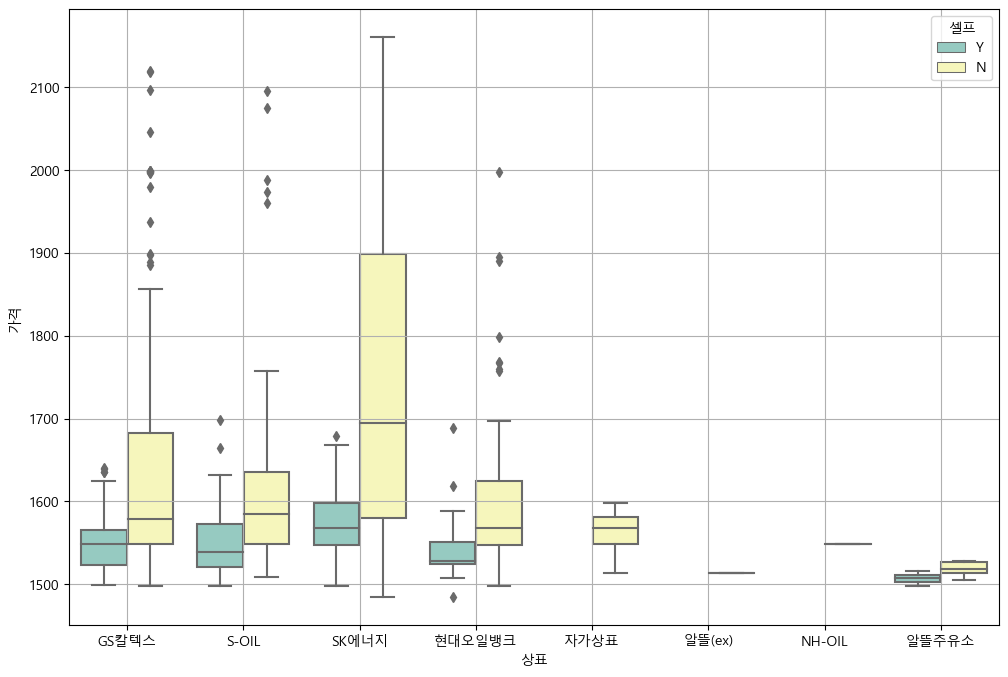

In [165]:
# boxplot(feat. seaborn)

plt.figure(figsize=(12,8))
sns.boxplot(x='상표', y='가격',hue='셀프',data=stations, palette='Set3')
plt.grid(True)
plt.show()

# 지도 시각화

In [166]:
import json
import folium
import warnings
warnings.simplefilter(action='ignore',category=FutureWarning)

In [167]:
# 가장 비싼 주유소 10개
stations.sort_values(by = '가격', ascending=False).head(10)

,상호,주소,가격,셀프,상표,구
411,뉴서울(강남),서울 강남구 언주로 716 (논현동),2160.0,N,SK에너지,강남구
336,장충주유소,서울 중구 장충단로 202 (장충동1가),2147.0,N,SK에너지,중구
115,양재주유소,서울 서초구 바우뫼로 178 (양재동),2145.0,N,SK에너지,서초구
335,서남주유소,서울 중구 통일로 30 (봉래동1가),2143.0,N,SK에너지,중구
410,오천주유소,서울 강남구 봉은사로 503 (삼성동),2137.0,N,SK에너지,강남구
295,갈월동주유소,서울특별시 용산구 한강대로 322 (갈월동),2136.0,N,SK에너지,용산구
296,강변주유소,서울특별시 용산구 원효로 9 (청암동),2136.0,N,SK에너지,용산구
294,흥국주유소,서울 용산구 한남대로 204 (한남동),2133.0,N,SK에너지,용산구
409,삼성주유소,서울 강남구 삼성로 521 (삼성동),2127.0,N,SK에너지,강남구
334,통일주유소,서울 중구 동호로 296 (장충동2가),2126.0,N,SK에너지,중구


In [168]:
# 가장 값싼 주유소 10개
stations.sort_values(by = '가격', ascending=True).head(10)

,상호,주소,가격,셀프,상표,구
297,타이거주유소,서울 은평구 수색로 188 (증산동),1484.0,N,SK에너지,은평구
298,(주)명연에너지 수색훼미리주유소,서울 은평구 수색로 236 (수색동),1485.0,Y,현대오일뱅크,은평구
217,(주)MS주유소,서울특별시 영등포구 대림로 230 (대림동),1498.0,N,현대오일뱅크,영등포구
219,(주)대청에너지 대청주유소,서울 영등포구 가마산로 328 (대림동),1498.0,N,GS칼텍스,영등포구
216,성락주유소,서울 영등포구 가마산로 414 (신길동),1498.0,Y,S-OIL,영등포구
215,(주)블루에너지,서울특별시 영등포구 가마산로 367 (대림동),1498.0,Y,SK에너지,영등포구
214,도림주유소,서울 영등포구 도림로 343 (도림동),1498.0,Y,알뜰주유소,영등포구
218,(주)강서오일,서울 영등포구 도신로 151 (도림동),1498.0,N,현대오일뱅크,영등포구
220,신길주유소,서울특별시 영등포구 신길로 74 (신길동),1499.0,Y,GS칼텍스,영등포구
447,풀페이주유소,서울특별시 구로구 경인로 41 (온수동),1504.0,N,SK에너지,구로구


In [170]:
import numpy as np
gu_data = pd.pivot_table(data = stations, index='구',values='가격', aggfunc=np.sum)
gu_data.head()

,가격
구,
강남구,77586.0
강동구,29397.0
강북구,18343.0
강서구,53727.0
관악구,27190.0


In [174]:
geo_path = '../data/02. skorea_municipalities_geo_simple.json'
geo_str = json.load(open(geo_path, encoding='utf-8'))
my_map = folium.Map(location=[37.5502,126.982], zoom_start=10.5, tiles='Stamen Toner')
my_map.choropleth(
    geo_data = geo_str, 
    data = gu_data,
    columns = [gu_data.index, '가격'],
    key_on = 'feature.id',
    fill_color = 'PuRd'
)
my_map